WeatherPy

Analysis
-There appears to be a correlation between humidity and latitude as the graph shows a concentration of cities in the Northern Hemisphere with high levels of humidity which can be attributed to the Summer season.
-The highest temperatures are found in cities closest to the Equator. It should be noted that there is an observable difference in temperature in cities that are 20-40 degrees north and 20-40 degrees south of the equator. There is a higher concentration of cities with warm temperatures in the Northern Hemisphere than there is in the Southern Hemisphere. But the further north a city is from the Equator, the cooler the temperature. The reason for the difference in temperature in cities located in the Northern Hemisphere is due to the tilt of the Earth which places certain areas in a position that is the closest to the Sun.
-Latitude does not appear to have any relation to cloudiness. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# URL for requests to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"
query_url = f"{url}appid={api_key}&units={unit}&q="


cloudiness = []
country = []
date = []
humidity = []
lat_data = []
lng_data = []
max_temp = []
wind_speed = []
city_null = []

counter = 0
set_counter = 1

print(f"Beginning Data Retrieval")
print(f"------------------------")
for city in cities:
    #Do all counter logic and print
    counter += 1
        
    if counter > 51:
        set_counter += 1
        counter = 1
    
    try:
    
        response = requests.get(query_url + city).json() 
    
        #append to the []
        city_null.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_data.append(response["coord"]["lat"])
        lng_data.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
    

        print(f"Processing Record " + str(counter)+ " of Set " + str(set_counter) + f" | {city}")   
    except KeyError:
        print(f"City not found. Skipping...")
print(f"-----------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | ochamchira
Processing Record 6 of Set 1 | pevek
City not found. Skipping...
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 12 of Set 1 | umm kaddadah
Processing Record 13 of Set 1 | shingu
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | iralaya
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | bundaberg
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | new ulm
Processing Record 23 of Set 1 | isangel
Processing Record 24 of Set 1 | saskylakh
Processing Re

Processing Record 3 of Set 5 | mont-dore
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | synya
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | birobidzhan
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | panzhihua
Processing Record 10 of Set 5 | ingham
Processing Record 11 of Set 5 | richards bay
Processing Record 12 of Set 5 | karratha
Processing Record 13 of Set 5 | nishihara
Processing Record 14 of Set 5 | jamestown
City not found. Skipping...
Processing Record 16 of Set 5 | lasa
Processing Record 17 of Set 5 | ales
Processing Record 18 of Set 5 | vardo
Processing Record 19 of Set 5 | riosucio
Processing Record 20 of Set 5 | beringovskiy
Processing Record 21 of Set 5 | berlevag
Processing Record 22 of Set 5 | caluquembe
Processing Record 23 of Set 5 | murray bridge
Processing Record 24 of Set 5 | san patricio
Processing Record 25 of Set 5 | georgetown
Processing Record 26 of Set 5 | puerto ayora
Processing Record 27 of Se

Processing Record 3 of Set 9 | maua
Processing Record 4 of Set 9 | acuitzio
Processing Record 5 of Set 9 | salalah
Processing Record 6 of Set 9 | biltine
Processing Record 7 of Set 9 | tezu
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 9 | arari
Processing Record 11 of Set 9 | hameenlinna
Processing Record 12 of Set 9 | dumai
Processing Record 13 of Set 9 | kutum
Processing Record 14 of Set 9 | viedma
Processing Record 15 of Set 9 | witu
Processing Record 16 of Set 9 | traralgon
Processing Record 17 of Set 9 | navirai
Processing Record 18 of Set 9 | ancud
Processing Record 19 of Set 9 | atbasar
Processing Record 20 of Set 9 | bosaso
Processing Record 21 of Set 9 | nauta
Processing Record 22 of Set 9 | zapolyarnyy
Processing Record 23 of Set 9 | palana
Processing Record 24 of Set 9 | husavik
Processing Record 25 of Set 9 | perdoes
Processing Record 26 of Set 9 | opuwo
Processing Record 27 of Set 9 | aklavik
City not found. Skipping...
Processing Rec

Processing Record 3 of Set 13 | taiyuan
Processing Record 4 of Set 13 | banjar
Processing Record 5 of Set 13 | chino valley
Processing Record 6 of Set 13 | les cayes
Processing Record 7 of Set 13 | gat
Processing Record 8 of Set 13 | pljevlja
Processing Record 9 of Set 13 | seoul
Processing Record 10 of Set 13 | hambantota
Processing Record 11 of Set 13 | yarega
City not found. Skipping...
Processing Record 13 of Set 13 | cacu
City not found. Skipping...
Processing Record 15 of Set 13 | myre
Processing Record 16 of Set 13 | pinega
Processing Record 17 of Set 13 | waddan
Processing Record 18 of Set 13 | dakar
Processing Record 19 of Set 13 | praia da vitoria
Processing Record 20 of Set 13 | ginda
Processing Record 21 of Set 13 | hopelchen
Processing Record 22 of Set 13 | thai nguyen
Processing Record 23 of Set 13 | balakhninskiy
Processing Record 24 of Set 13 | buenos aires
Processing Record 25 of Set 13 | tiarei
Processing Record 26 of Set 13 | chokurdakh
Processing Record 27 of Set 13

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,12,GL,1536897000,74,69.22,-51.10,28.40,1.12
1,Hobart,0,AU,1536897600,32,-42.88,147.33,69.80,17.22
2,Alice Springs,0,AU,1536897600,7,-23.70,133.88,89.60,10.29
3,Khatanga,12,RU,1536899235,100,71.98,102.47,41.23,10.76
4,Ochamchira,68,GE,1536899235,79,42.71,41.47,78.58,7.74


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#create city_data dict (will become dataframe) (parse request)
weather_dict = {
    "City": city_null,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat_data,
    "Lng": lng_data,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

In [ ]:
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("WeatherData.csv", index=False)
weather_df.head()


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

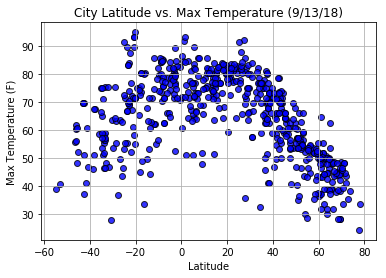

In [6]:

lat_plot = weather_df["Lat"]
temp_plot = weather_df["Max Temp"]

plt.scatter(lat_plot, 
            temp_plot, 
            c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (9/13/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Humidity Plot

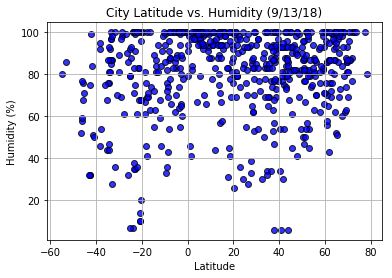

In [7]:
lat_plot = weather_df["Lat"]
temp_plot = weather_df["Humidity"]

plt.scatter(lat_plot, 
            temp_plot, 
            c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (9/13/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

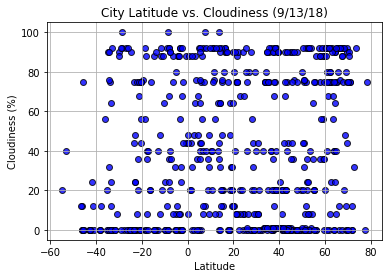

In [8]:
lat_plot = weather_df["Lat"]
temp_plot = weather_df["Cloudiness"]

plt.scatter(lat_plot, 
            temp_plot, 
            c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (9/13/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

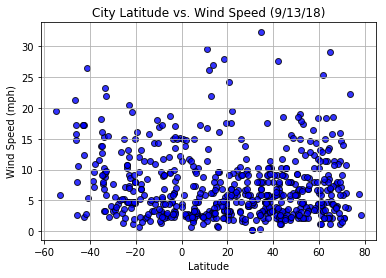

In [9]:
lat_plot = weather_df["Lat"]
temp_plot = weather_df["Wind Speed"]

plt.scatter(lat_plot, 
            temp_plot, 
            c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (9/13/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)